In [2]:
import cv2 as cv
import pickle
import numpy as np
import math
from IPython.core.interactiveshell import InteractiveShell
from matplotlib import pyplot as plt
# InteractiveShell.ast_node_interactivity = "all"

In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
d = unpickle('../data/data_batch_1')

In [5]:
s_visited = [0] * 10
pic_array = []
total = 0
for index, labels in enumerate(d[b'labels']):
    if s_visited[labels] == 0:
        pic_array.append(d[b'data'][index].reshape(3, 32, 32))
        total += 1
        s_visited[labels] = 1
        if total >= 10:
            break

In [6]:
len(pic_array)

10

In [46]:
def show_pic(img, rank):

    img = img.transpose(1, 2, 0)
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    f, axarr = plt.subplots(1, 2, figsize=(8, 8)) 
    axarr[0].imshow(img)
    axarr[1].imshow(gray, cmap='gray', vmin=0, vmax=255)
    plt.show()
    
    para_list = [[0.04, 10, 1.6], [0.08, 10, 1.6], [0.04, 20, 1.6], [0.04, 10, 0.8], [0.04, 15, 1]]
    img_list = []
    for para in para_list:
        sift = cv.SIFT_create(contrastThreshold=para[0], edgeThreshold=para[1], sigma=para[2])
        kp = sift.detect(gray, None)
        res = cv.drawKeypoints(gray, kp, cv.cvtColor(img, cv.COLOR_RGB2BGR), flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
        img_list.append(cv.cvtColor(res, cv.COLOR_BGR2RGB))
    
    f, axarr = plt.subplots(1, 5, figsize=(15, 15))
    for i in range(5):
        axarr[i].imshow(img_list[i])
        cv.imwrite('../data/HW2/problem2_results/{}_img_line_{}.jpg'.format(rank, i), cv.cvtColor(img_list[i], cv.COLOR_RGB2BGR))
    plt.show()
    
    

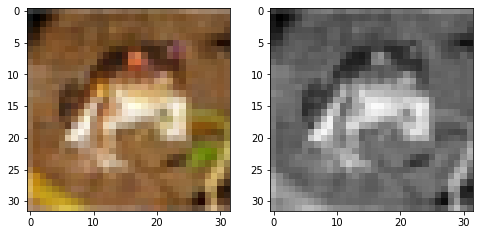

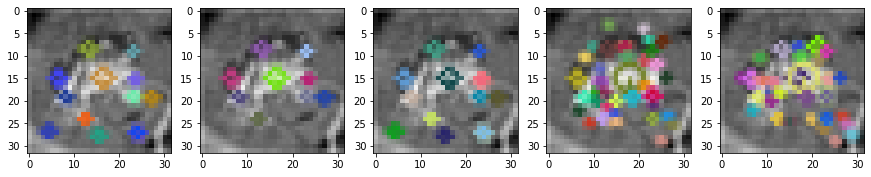

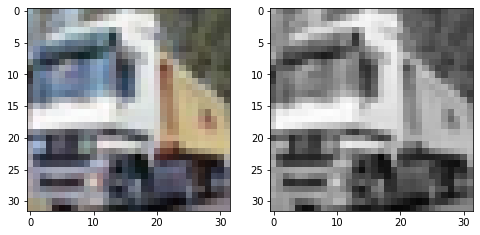

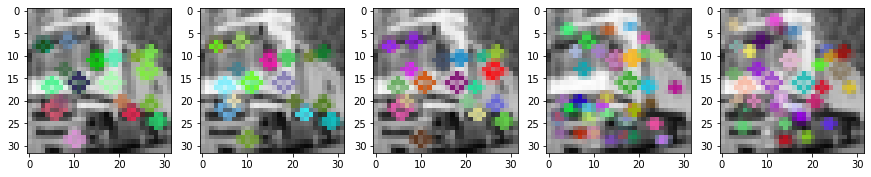

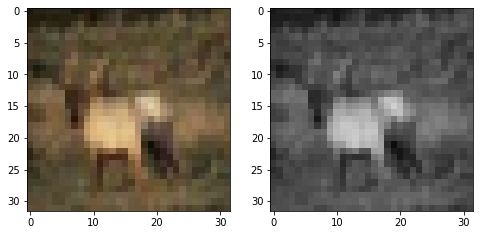

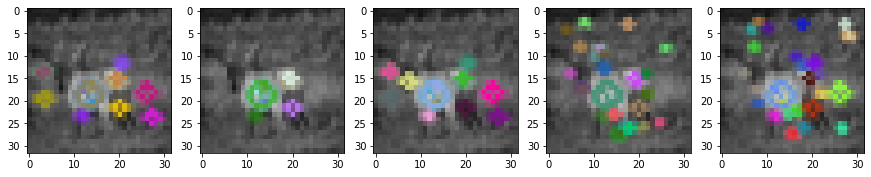

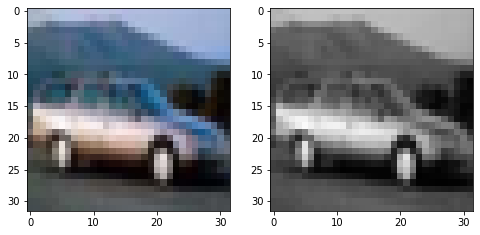

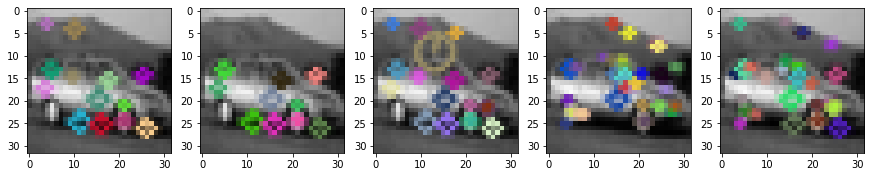

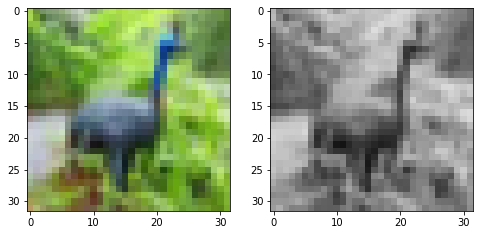

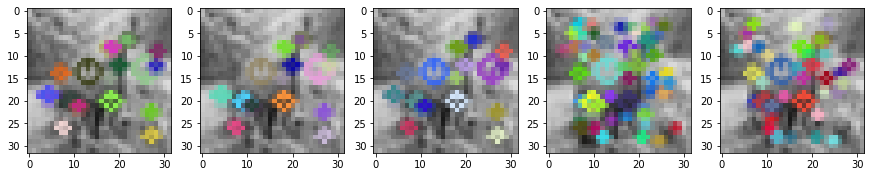

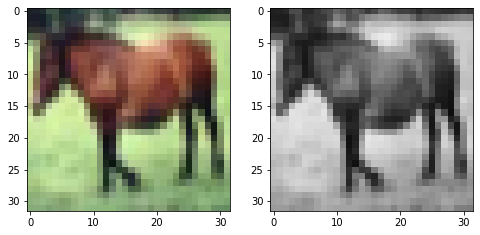

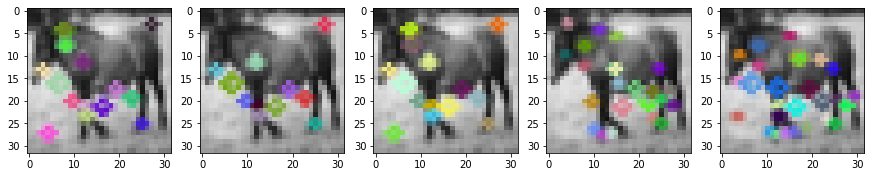

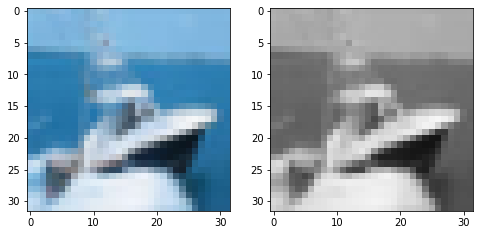

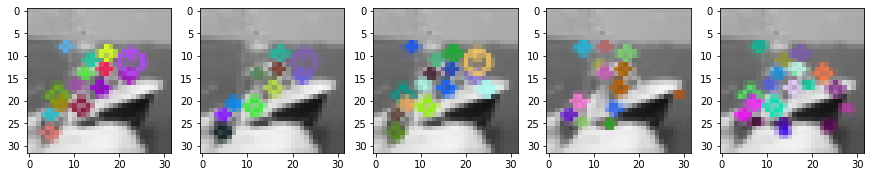

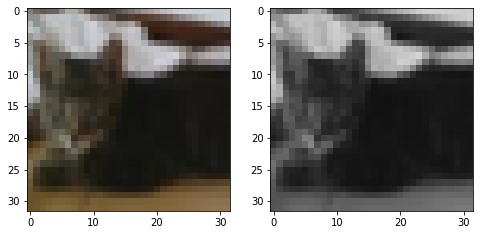

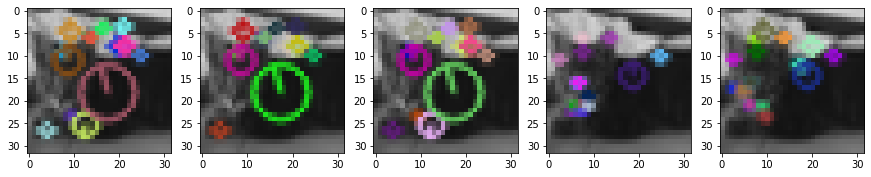

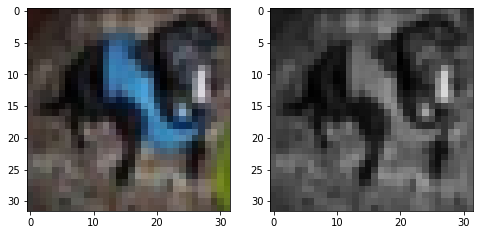

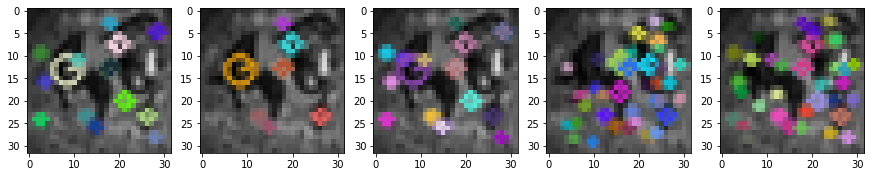

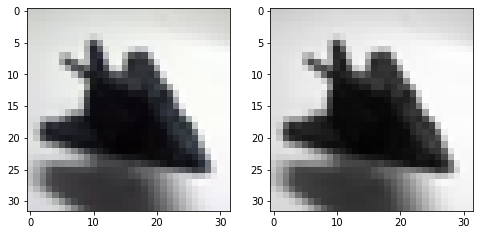

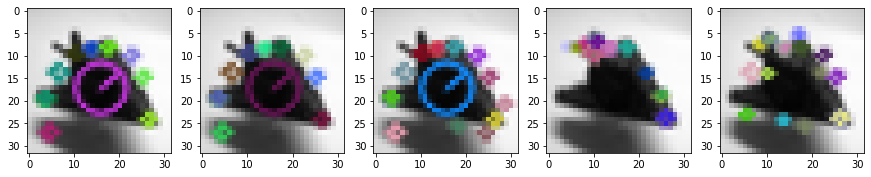

In [47]:
for index, img in enumerate(pic_array):
    show_pic(img, index)

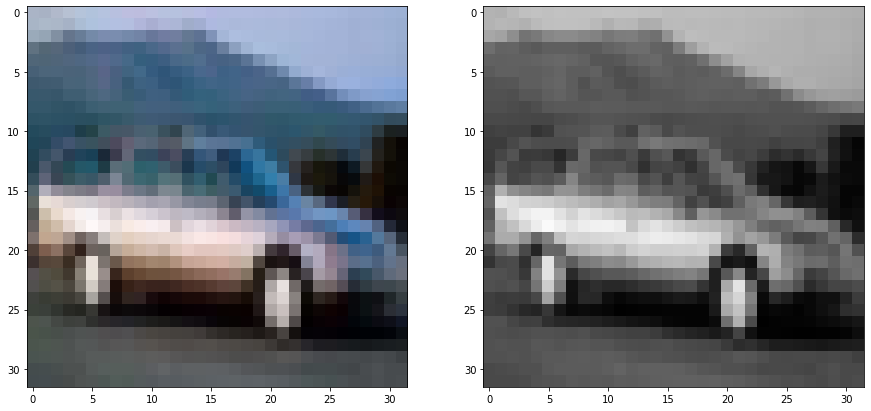

In [42]:
sift = cv.SIFT_create(contrastThreshold=0.04, edgeThreshold=5, sigma=1)
kp = sift.detect(gray,None)
res = cv.drawKeypoints(gray, kp, cv.cvtColor(img, cv.COLOR_RGB2BGR), flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
res = cv.cvtColor(res, cv.COLOR_BGR2RGB)

[]

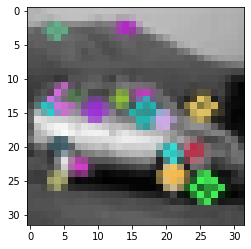

In [43]:
plt.imshow(res)
plt.plot(figsize=(20, 20))